In [1]:
%matplotlib inline

import pandas as pd

# Cargar

### Datos sobre Foursquare checkins en NYC, descargados desde [la página de Dingqi Yang](https://sites.google.com/site/yangdingqi/home/foursquare-dataset)

In [10]:
data = pd.read_csv('checkins.csv', sep='\t', names=['user_id', 'venue_id'])

In [11]:
data.head()

,user_id,venue_id
0,35443,899
1,24973,42406
2,14860,177
3,222505,177
4,63524,609


Primero vemos cuantos usuarios únicos hay

In [12]:
len(data['user_id'].unique())

2060

In [13]:
len(data['venue_id'].unique())

2876

In [ ]:
Añadimos una columna que nos va a ayudar a contar el número de veces que un user visita un venue

In [15]:
data['checkin']=1

Ahora vemos si hay duplicados, si un usuario ha visitado un sitio muchas veces

In [16]:
data.groupby(['user_id', 'venue_id']).count()

checkin
user_id venue_id         
6       278             2
15      910             1
        1070            1
        1254            2
        1329            1
        11660           1
        12508           1
25      16625           1
        47540           1
        72623           1
72      4283            2
        5004            2
        12222           2
        16983           1
        73254           2
99      577             1
        1085            1
        1316            1
        4529            1
        10786           1
        16699           1
102     1372            2
        1376            2
        3246            1
        4513            4
        5608            1
        7578            1
        7594            1
        10814           2
        10965           1
...                   ...
265904  140749         16
265965  200             2
        1073            2
        1129            1
        3362            1
        5867            2
        6305            2
        6403            1
        8702            1
        11734           2
        12222           1
        13826           1
        32742           2
        51660           2
        667293          2
266532  925             1
        4310            2
        10604           2
        11942           1
        19182          14
        21041           1
        22768           2
        47026           4
266576  10289           1
        17779           1
        34553           1
266712  4889            2
        8228            1
        9953            2
        10969           1

[13472 rows x 1 columns]

Lo ordenamos por número de visitas para verlo más claramente

In [17]:
data.groupby(['user_id', 'venue_id']).count().sort_values('checkin', ascending=False)

,,checkin
user_id,venue_id,
51957,435580,149
51445,64971,92
17238,9209,86
8952,39242,74
133970,41096,73
39836,15743,72
38456,7999,69
59959,5222,63
17238,82634,55


Para medir la distancia entre vectores definidos sobre un espacio vectorial booleano se puede usar la distancia de Jaccard, para eso primero tenemos que quitar los duplicados

In [18]:
data = data.drop_duplicates()

In [19]:
data.shape

(13472, 3)

# Transformar

In [20]:
data.head()

,user_id,venue_id,checkin
0,35443,899,1
1,24973,42406,1
2,14860,177,1
3,222505,177,1
4,63524,609,1


In [10]:
len(set(data['user_id']))

2060

In [11]:
len(set(data['venue_id']))

2876

In [21]:
checkins_matrix = data.reset_index()\
    .pivot(index='venue_id', columns='user_id', values='checkin')\
    .fillna(0)\
    .astype(int)

In [22]:
checkins_matrix.head()

user_id,6,15,25,72,99,102,104,105,129,131,...,264033,264057,264722,264953,265643,265904,265965,266532,266576,266712
venue_id,,,,,,,,,,,,,,,,,,,,,
15,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
20,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
25,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
26,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
36,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [23]:
checkins_matrix.shape

(2876, 2060)

Calculamos cuantas visitas tiene cada sitio

In [26]:
checkins_matrix.sum(axis=1)

venue_id
15          1
20         20
25         29
26          2
36         10
39          2
40          4
42          8
46         16
47         14
52          2
59          2
77          6
78          4
83          4
86          6
88          2
98          3
99          2
102         1
105        10
114         8
115         9
123        12
133         3
138         6
141         2
142         7
148         5
154         2
           ..
1170409     1
1210157     2
1225401     1
1283376     6
1285202     1
1337942     1
1443163     2
1450342     5
1598475     2
1654176     4
1719875     1
1742184     1
1760748    16
1782104     5
1809245     2
1930899     1
1930905     1
1944209     1
1945122     1
1948043     4
1995366     4
2053266     1
2067414     2
2133943     1
2154515     5
2167106     1
2232344     1
2302016     1
2376156     1
2422200     1
dtype: int64

# Visualizar

Visualizamos las visitas

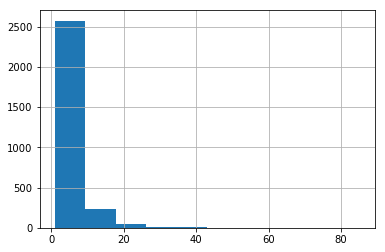

In [25]:
checkins_matrix.sum(axis=1).hist()

La gran mayoría de los lugares han sido visitados entre 0 y 10 veces. Lo vemos en términos de órdenes de magnitud

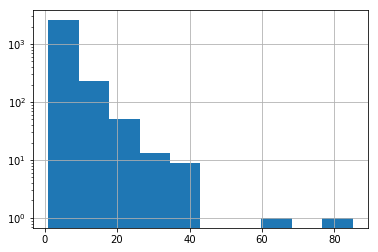

In [27]:
checkins_matrix.sum(axis=1).hist(log=True)

# Computar similaridades

Vemos cómo se define la similaridad de Jaccard

In [16]:
venue_1 = {1, 2, 4}

In [17]:
venue_2 = {3, 2, 4}

In [18]:
intersection = venue_1.intersection(venue_2)

In [19]:
len(intersection)

2

In [20]:
union = venue_1.union(venue_2)

In [21]:
len(union)

4

In [22]:
len(intersection) / len(union)

0.5

In [28]:
def jaccard_similarity(venue_1, venue_2):
    venue_1_user_indices = set( venue_1[venue_1 > 0].index )
    venue_2_user_indices = set( venue_2[venue_2 > 0].index )
    intersection_length = len(venue_1_user_indices.intersection(venue_2_user_indices))
    union_length = len(venue_1_user_indices.union(venue_2_user_indices))
    
    return intersection_length / union_length

In [29]:
def compute_pairwise_jaccard_similarities(query_venue_index):
    query_venue = checkins_matrix.ix[query_venue_index]
    candidate_venues = checkins_matrix.drop(query_venue_index, axis=0)
    similarities = {}
    
    for candidate_venue_id, candidate_venue in candidate_venues.iterrows():
        similarity = jaccard_similarity(query_venue, candidate_venue)
        similarities[candidate_venue_id] = similarity
        
    return pd.Series(similarities)

# Recomendar

In [30]:
checkins_matrix.head()

user_id,6,15,25,72,99,102,104,105,129,131,...,264033,264057,264722,264953,265643,265904,265965,266532,266576,266712
venue_id,,,,,,,,,,,,,,,,,,,,,
15,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
20,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
25,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
26,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
36,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
while True:
    try:
        query_venue_index = int( input('Please enter a query venue index: ') )
        print( compute_pairwise_jaccard_similarities(query_venue_index).sort_values(ascending=False).head(5) )
    except:
        pass

Please enter a query venue index: 26
2606      0.500000
12142     0.250000
96751     0.166667
32869     0.166667
407167    0.166667
dtype: float64
Please enter a query venue index: 15
119774    0.333333
43052     0.333333
19700     0.111111
11536     0.000000
11678     0.000000
dtype: float64
Please enter a query venue index: 36
46904      0.153846
1476       0.153846
1283376    0.142857
8613       0.105263
242095     0.100000
dtype: float64
